In [1]:
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer as vector
from sklearn.model_selection import train_test_split as trtes
from sklearn.metrics.pairwise import cosine_similarity as cs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('movies.csv')
data.head(10)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
5,5,258000000,Fantasy Action Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity amnesia sandstorm love of one's ...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,...,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,Tobey Maguire Kirsten Dunst James Franco Thoma...,"[{'name': 'Francine Maisler', 'gender': 1, 'de...",Sam Raimi
6,6,260000000,Animation Family,http://disney.go.com/disneypictures/tangled/,38757,hostage magic horse fairy tale musical,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,...,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,Zachary Levi Mandy Moore Donna Murphy Ron Perl...,"[{'name': 'John Lasseter', 'gender': 2, 'depar...",Byron Howard
7,7,280000000,Action Adventure Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic sequel superhero based on comic b...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,...,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,Robert Downey Jr. Chris Hemsworth Mark Ruffalo...,"[{'name': 'Danny Elfman', 'gender': 2, 'depart...",Joss Whedon
8,8,250000000,Adventure Fantasy Family,http://harrypotter.warnerbros.com/harrypottera...,767,witch magic broom

In [3]:
display(data.shape)

(4803, 24)

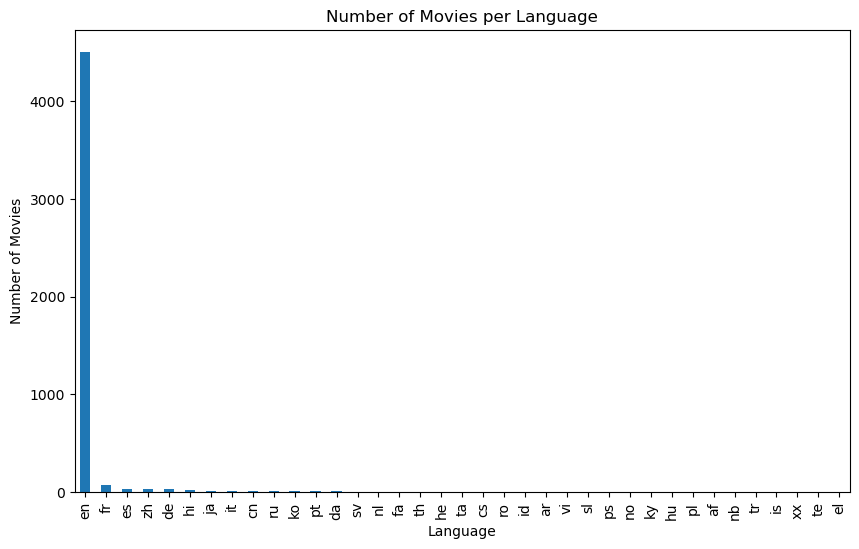

In [4]:
language_counts = data['original_language'].value_counts()
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar')
plt.title('Number of Movies per Language')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.show()

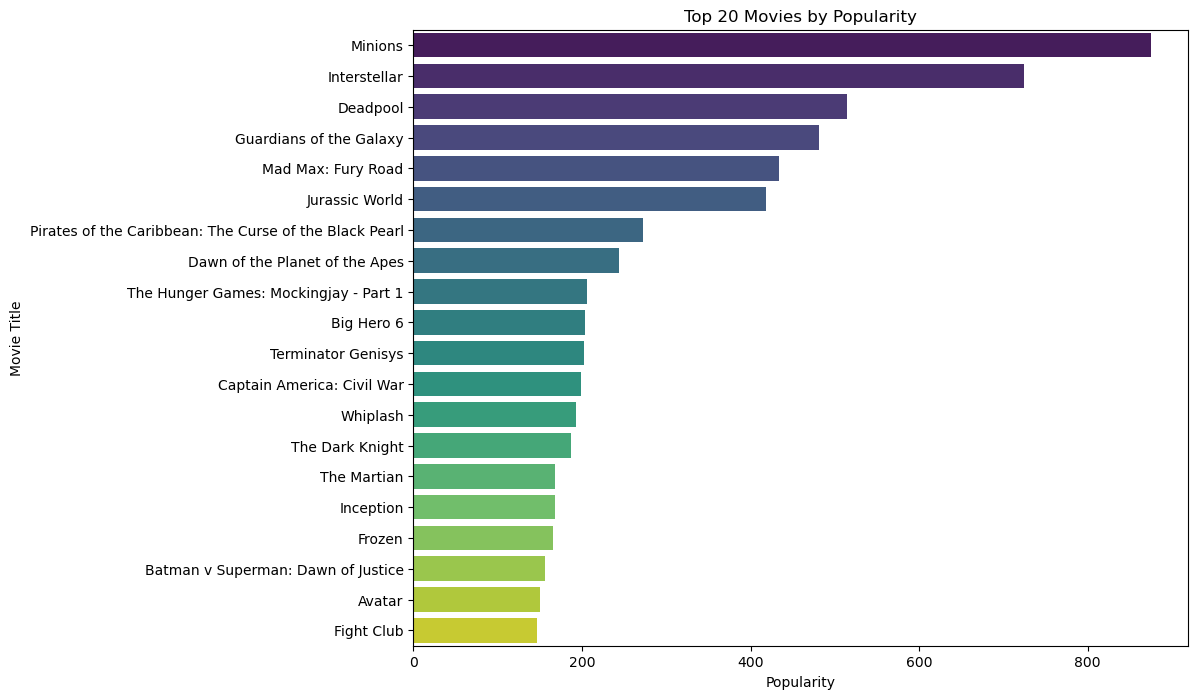

In [5]:
data_sort = data.sort_values(by='popularity', ascending=False)
top_movies = data_sort.head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x='popularity', y='title', data=top_movies, palette='viridis')
plt.title('Top 20 Movies by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.show()

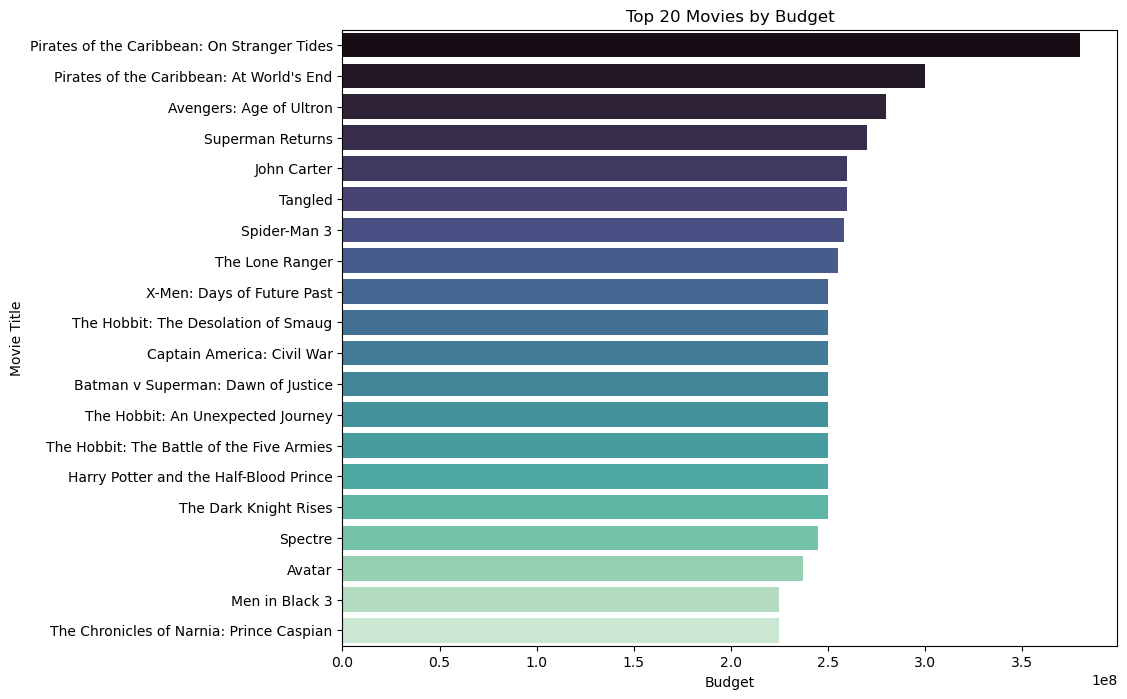

In [6]:
data_sorted = data.sort_values(by='budget', ascending=False)
top_budget = data_sorted.head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x='budget', y='title', data=top_budget, palette='mako')
plt.title('Top 20 Movies by Budget')
plt.xlabel('Budget')
plt.ylabel('Movie Title')
plt.show()

In [7]:
display (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

None

In [8]:
data.fillna(' ', inplace=True)

In [9]:
display (data.isna().sum())

index                   0
budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
director                0
dtype: int64

In [10]:
features = ['title','genres','original_title','overview','cast','director','tagline']

In [11]:
data = data.astype(str)
combining = data['title'] + ' ' + data['original_title'] + ' ' + data['overview'] + ' '+ data['genres'] + ' ' + data['cast'] + ' ' + data['director'] + ' ' + data['tagline']
print(combining)

0       Avatar Avatar In the 22nd century, a paraplegi...
1       Pirates of the Caribbean: At World's End Pirat...
2       Spectre Spectre A cryptic message from Bond’s ...
3       The Dark Knight Rises The Dark Knight Rises Fo...
4       John Carter John Carter John Carter is a war-w...
                              ...                        
4798    El Mariachi El Mariachi El Mariachi just wants...
4799    Newlyweds Newlyweds A newlywed couple's honeym...
4800    Signed, Sealed, Delivered Signed, Sealed, Deli...
4801    Shanghai Calling Shanghai Calling When ambitio...
4802    My Date with Drew My Date with Drew Ever since...
Length: 4803, dtype: object


In [12]:
display (data[features].isna().sum())

title             0
genres            0
original_title    0
overview          0
cast              0
director          0
tagline           0
dtype: int64

In [13]:
vector= vector()
newvectors = vector.fit_transform(combining)
print("Shape of feature vectors:", newvectors.shape)

Shape of feature vectors: (4803, 30898)


In [14]:
cosine = cs(newvectors, newvectors)
print("Shape of cosine similar to matrix:", cosine.shape)
print("Cosine similarity between first and second movies:", cosine[0, 1])

Shape of cosine similar to matrix: (4803, 4803)
Cosine similarity between first and second movies: 0.059493824645988215


In [15]:
fmn = input("Enter your Favourate movie: ")
match = difflib.get_close_matches(fmn, data['title'].tolist())
if match:
    match = match[0]
    print("Did you mean '{}'?".format(match))
    confirm = input("if yes enter 'yes' if no then enter 'no' to re-enter: ").lower()
    if confirm == 'yes':
        print("Your entered movie '{}' is present.".format(match))
    else:
        print("Please enter the movie that is in the dataset 'data'.")

Enter your Favourate movie: batman
Did you mean 'Batman'?
if yes enter 'yes' if no then enter 'no' to re-enter: yes
Your entered movie 'Batman' is present.


In [16]:
favourate = data['title'].tolist()
print("List of the first 50 movie :")
for name in favourate[:50]:
    print(name)


List of the first 50 movie :
Avatar
Pirates of the Caribbean: At World's End
Spectre
The Dark Knight Rises
John Carter
Spider-Man 3
Tangled
Avengers: Age of Ultron
Harry Potter and the Half-Blood Prince
Batman v Superman: Dawn of Justice
Superman Returns
Quantum of Solace
Pirates of the Caribbean: Dead Man's Chest
The Lone Ranger
Man of Steel
The Chronicles of Narnia: Prince Caspian
The Avengers
Pirates of the Caribbean: On Stranger Tides
Men in Black 3
The Hobbit: The Battle of the Five Armies
The Amazing Spider-Man
Robin Hood
The Hobbit: The Desolation of Smaug
The Golden Compass
King Kong
Titanic
Captain America: Civil War
Battleship
Jurassic World
Skyfall
Spider-Man 2
Iron Man 3
Alice in Wonderland
X-Men: The Last Stand
Monsters University
Transformers: Revenge of the Fallen
Transformers: Age of Extinction
Oz: The Great and Powerful
The Amazing Spider-Man 2
TRON: Legacy
Cars 2
Green Lantern
Toy Story 3
Terminator Salvation
Furious 7
World War Z
X-Men: Days of Future Past
Star Trek 

In [17]:
if match and match in favourate:  
    selected = favourate.index(match)
    similar = cosine[selected]
    similar = similar.argsort()[::-1]
    N = 10  
    print("Top 10 similar movies to '{}':".format(match))
    for index in similar[1:N+1]:  
        similarmovies = favourate[index]
        print("{}".format(similarmovies))  
else:
    print("The movie '{}' is not in the list.".format(fmn))
    print("Please enter a movie that is in the list.")

Top 10 similar movies to 'Batman':
Batman Returns
Batman Begins
Batman: The Dark Knight Returns, Part 2
The Dark Knight Rises
The Dark Knight
Batman Forever
Batman & Robin
Batman v Superman: Dawn of Justice
Batman
Underworld


In [18]:
print("Top 10 movies similar to '{}':".format(match))
for i, index in enumerate(similar[1:11]):  
    similarmovies = favourate[index]
    score = cosine[selected][index]  
    print("{}. {} = {:.3f}".format(i+1, similarmovies, score))

Top 10 movies similar to 'Batman':
1. Batman Returns = 0.388
2. Batman Begins = 0.319
3. Batman: The Dark Knight Returns, Part 2 = 0.315
4. The Dark Knight Rises = 0.297
5. The Dark Knight = 0.282
6. Batman Forever = 0.246
7. Batman & Robin = 0.234
8. Batman v Superman: Dawn of Justice = 0.207
9. Batman = 0.144
10. Underworld = 0.118


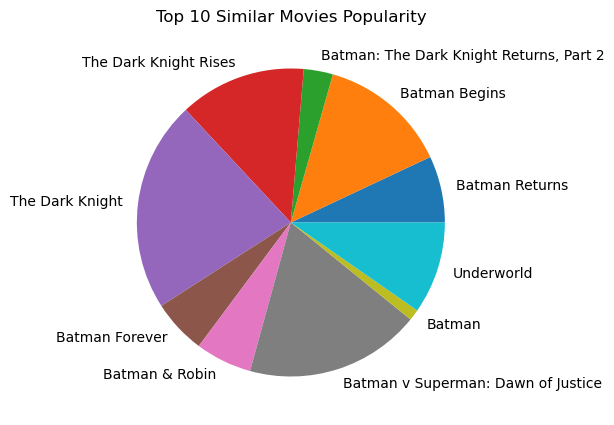

In [19]:
newsimilar = similar[1:11]
t = data.iloc[newsimilar]
plt.figure(figsize=(10, 5))
plt.pie(t['popularity'], labels=t['title'])
plt.title('Top 10 Similar Movies Popularity')
plt.show()

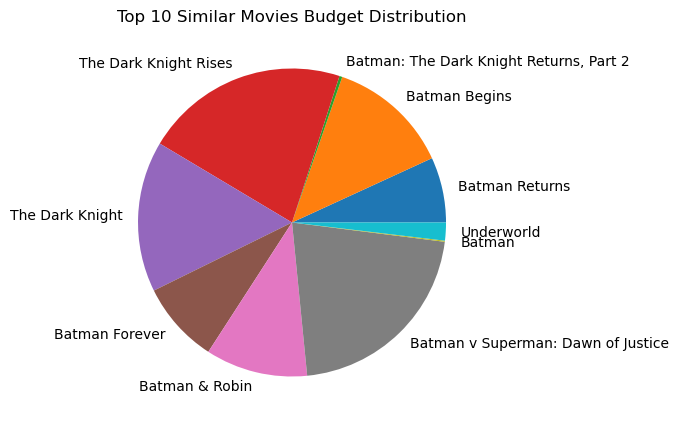

In [20]:
plt.figure(figsize=(10, 5))
plt.pie(t['budget'], labels=t['title'])
plt.title('Top 10 Similar Movies Budget Distribution')
plt.show()